# CIFAR-10 with AlexNet


References:
1.   [Richmond Alake](https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342)
2.   [Jeff Heaton](https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb)
3.   [Jan Holub](https://github.com/j-holub/Cifar-10-Image-Classifcation-using-LeNet5)
4. [Jason Brownlee](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)
5. [Jeremy Fix](https://teaching.pages.centralesupelec.fr/deeplearning-lectures-build/00-keras-mnist.html)

# 1. Dataset Preparation



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Check that we are using GPU
testGPU = tf.test.gpu_device_name()
if testGPU == '':
  print('GPU not selected')
else:
  print("GPU is on, let's goooo!")

GPU is on, let's goooo!


In [ ]:
# Load the dataset
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


<Figure size 432x288 with 0 Axes>

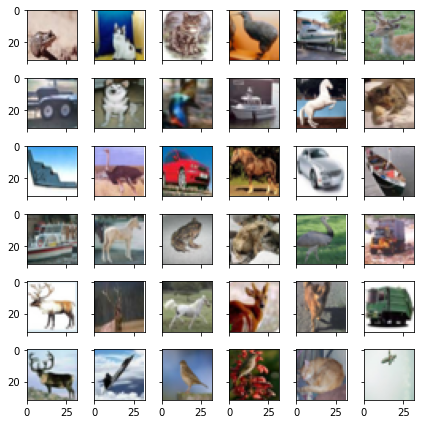

In [ ]:
# OPTIONAL: Display some dataset samples as an image 
%matplotlib inline
import matplotlib.pyplot as plt
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)
sample_images = x_train[random_indices, :]
plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    ax.imshow(sample_images[i])
    
    ax.set_xbound([0,32])

plt.tight_layout()
plt.show()

In [ ]:
# Normalize images to the [0, 1] range
# This is to make the calculations more efficient
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (32, 32, 3)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class label vectors to binary class matrices (convert to 1-hot format)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# OPTIONAL: Use tensorboard to display graphs
# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime
# create keras TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# specify the log directory
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# 2. Select/Design CNN Model

Instructions:
1. Choose one of these models to train. DO NOT RUN ALL CELLS HERE. Just choose one, then see the output.
2. When you are ready, customize your own model. Do this by adding more convolutional layers, modifying layer size, changing hyperparameters such as kernel size, stride, padding, [optimizer type](https://keras.io/api/optimizers/) or learning_rate.

In [ ]:
# 2-layer NN (Task 1)
model = keras.Sequential(
    [
      # Input layer
      layers.Flatten(input_shape=(32, 32, 3)), #Flatten
      # Hidden layer(s)
      layers.Dense(100, activation='relu'), 
      # Output layer
      layers.Dense(10, activation='softmax')
    ]
)
model.summary()

In [ ]:
# simple LeNet model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

In [ ]:
# LeNet-5 complete model (Task 2)
model = keras.Sequential([
    layers.Conv2D(20, kernel_size=5, strides=1, activation='relu', input_shape=x_train[0].shape, padding='same'), #C1
    layers.MaxPooling2D(pool_size=(2, 2), strides=2), #S2
    layers.Conv2D(50, kernel_size=5, strides=1, activation='relu', padding='same'), #C3
    layers.MaxPooling2D(), #S4
    layers.Flatten(), #Flatten
    layers.Dense(500, activation='relu'), #C5
    # layers.Dense(84, activation='tanh'), #F6
    layers.Dense(10, activation='softmax') #Output layer
])
model.summary()

In [ ]:
# LeNet-5 modified model (Task 2)
#model = keras.Sequential([
    #layers.Conv2D(30, kernel_size=3, strides=1,  activation='relu', padding='valid', input_shape=x_train[0].shape), #C1
    #layers.MaxPooling2D(pool_size=(2, 2), padding='valid'), #S2
    #layers.Conv2D(13, kernel_size=3, strides=1, activation='relu', padding='valid'), #C3
    #layers.MaxPooling2D(pool_size=(2, 2), padding='valid'), #S2
    #layers.Flatten(), #Flatten
    layers.Dense(120, activation='relu'), #C5
    layers.Dropout(.5, input_shape=(2,)),
    layers.Dense(86, activation='relu'), #F6
    layers.Dropout(.5, input_shape=(2,)),
    layers.Dense(10, activation='softmax') #Output layer
])
model.summary()

In [ ]:
#AlexNet model
model = keras.Sequential([
      layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=x_train[0].shape), #input layer 
      layers.MaxPooling2D(pool_size=(3, 3), strides=1, padding='same'), #Pool 1
      layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), #Conv 2
      layers.MaxPooling2D(pool_size=(3, 3), strides=1, padding='same'), #Pool 2
      layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #Conv 3
      layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), #Conv 4
      layers.Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='same'), #Conv 5
      layers.MaxPooling2D(pool_size=(3, 3), strides=1, padding='same'), #Pool 5
      layers.Flatten(), #Flatten
      layers.Dense(8192, activation='relu'), #C5
      layers.Dropout(.5, input_shape=(2,)),
      layers.Dense(8192, activation='relu'), #F6
      layers.Dropout(.5, input_shape=(2,)),
      layers.Dense(10, activation='softmax') #Output layer
      ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        1

# 3. Train the model

In [ ]:
# set the loss, optimizer and metrics
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
# train/fit the model
model.fit(x_train, y_train, batch_size=512, epochs=35, validation_split=0.1)

Epoch 1/35
88/88 [==============================] - 20s 120ms/step - loss: 1.9065 - accuracy: 0.2973 - val_loss: 1.6308 - val_accuracy: 0.3984
Epoch 2/35
88/88 [==============================] - 10s 113ms/step - loss: 1.5683 - accuracy: 0.4288 - val_loss: 1.4985 - val_accuracy: 0.4586
Epoch 3/35
88/88 [==============================] - 10s 117ms/step - loss: 1.4388 - accuracy: 0.4805 - val_loss: 1.3558 - val_accuracy: 0.5110
Epoch 4/35
88/88 [==============================] - 10s 116ms/step - loss: 1.3452 - accuracy: 0.5155 - val_loss: 1.2962 - val_accuracy: 0.5366
Epoch 5/35
88/88 [==============================] - 10s 117ms/step - loss: 1.2725 - accuracy: 0.5444 - val_loss: 1.2485 - val_accuracy: 0.5514
Epoch 6/35
88/88 [==============================] - 11s 120ms/step - loss: 1.2192 - accuracy: 0.5664 - val_loss: 1.1706 - val_accuracy: 0.5862
Epoch 7/35
88/88 [==============================] - 11s 122ms/step - loss: 1.1628 - accuracy: 0.5856 - val_loss: 1.1435 - val_accuracy: 0.5932

In [ ]:
# Evaluate the trained model performance
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.8897 - accuracy: 0.7275
Test loss: 0.889740526676178
Test accuracy: 0.7275000214576721


## (Optional) Use TensorBoard to display some nice graphs

In [ ]:
# train the model and save training performance parameters into training_history
training_history = model.fit(
    x_train, # input data 
    y_train, # output classes
    batch_size=128, 
    epochs=50, 
    validation_split=0.1, 
    verbose=0, # Suppress chatty output; use Tensorboard instead 
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
)

In [ ]:
tensorboard --logdir logs/fit

# 4. Test the trained model

### User can upload own image here. Make sure image is square.

In [ ]:
# Upload file from disk
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print("Upoaded file:", fn)

Saving Plane 1.jpg to Plane 1.jpg
Upoaded file: Plane 1.jpg


In [ ]:
from PIL import Image, ImageOps # import pillow image manipulation tool

# Load the image to be tested
user_image = Image.open(fn)

# Resize to input_shape
user_image = user_image.resize((input_shape[0],input_shape[1]))
user_image = np.array(user_image).astype("float32") / 255
# user_image = np.expand_dims(user_image, axis=0)
user_image = user_image.reshape(-1, 32, 32, 3)
print("user_image shape:", user_image.shape)

# Predict the class of the drawing 
result = model.predict(user_image, batch_size=1)
print(result)
result = np.argmax(result,axis=1)
print("The AI thinks this is class:", result[0])


user_image shape: (1, 32, 32, 3)
1/1 [==============================] - 0s 14ms/step
[[9.9925858e-01 2.9810690e-07 2.6716740e-04 1.3563863e-06 2.4870023e-05
  2.8725856e-07 2.2670224e-06 3.1982307e-08 4.4323882e-04 1.9121655e-06]]
The AI thinks this is class: 0


In [ ]:
class_names = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
class_names[result[0]]

'airplane'